In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('duolingo_user_retention.csv')

# View first few rows
df.head()

,user_id,days_active,avg_session_length,language_streak_days,num_push_notifications,num_lessons_completed,used_gems,watched_ad,return_tomorrow
0,1,103,24.77,59,2,1,1,0,1
1,2,349,9.41,62,0,2,1,0,1
2,3,271,20.63,5,0,9,0,0,1
3,4,107,7.86,31,3,0,0,1,0
4,5,72,17.67,92,2,1,1,0,1


In [2]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Basic statistics
df.describe()

Dataset shape: (1000, 9)

Missing values:
 user_id                   0
days_active               0
avg_session_length        0
language_streak_days      0
num_push_notifications    0
num_lessons_completed     0
used_gems                 0
watched_ad                0
return_tomorrow           0
dtype: int64


,user_id,days_active,avg_session_length,language_streak_days,num_push_notifications,num_lessons_completed,used_gems,watched_ad,return_tomorrow
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,181.374000,13.626680,48.470000,1.995000,4.593000,0.581000,0.291000,0.673000
std,288.819436,103.360018,6.697833,29.095148,1.421617,2.886812,0.493642,0.454451,0.469352
min,1.000000,1.000000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,97.750000,7.550000,22.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,500.500000,180.000000,13.885000,48.000000,2.000000,5.000000,1.000000,0.000000,1.000000
75%,750.250000,268.000000,19.440000,74.000000,3.000000,7.000000,1.000000,1.000000,1.000000
max,1000.000000,364.000000,24.990000,99.000000,4.000000,9.000000,1.000000,1.000000,1.000000


/var/folders/pz/qq_g0z9j55vd4plml29lz6n40000gn/T/ipykernel_26681/638638816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='return_tomorrow', data=df, palette='Set2')


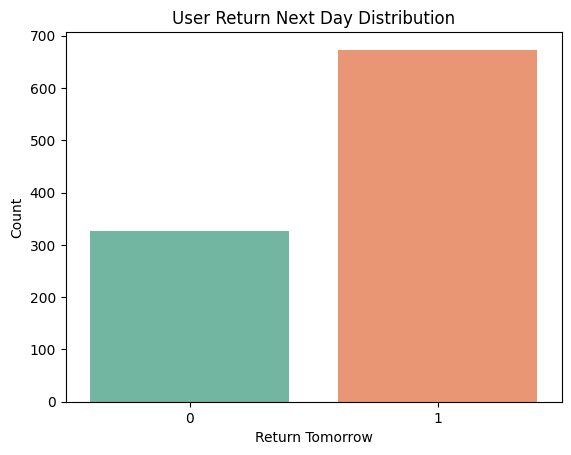

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
sns.countplot(x='return_tomorrow', data=df, palette='Set2')
plt.title('User Return Next Day Distribution')
plt.xlabel('Return Tomorrow')
plt.ylabel('Count')
plt.show()

/var/folders/pz/qq_g0z9j55vd4plml29lz6n40000gn/T/ipykernel_26681/3795536255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


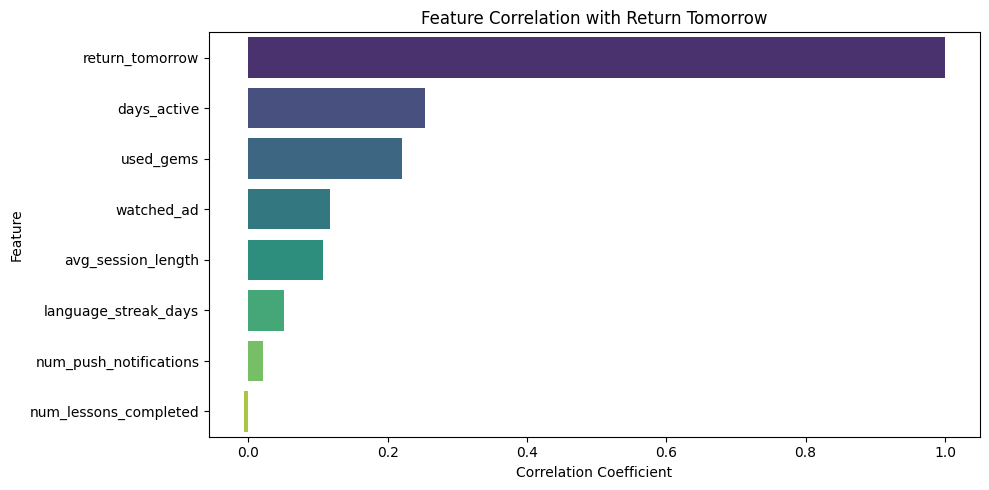

In [4]:
# Check correlation of features with the target
correlation = df.drop(columns='user_id').corr()['return_tomorrow'].sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Feature Correlation with Return Tomorrow')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        73
           1       0.71      0.79      0.75       127

    accuracy                           0.66       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.65      0.66      0.65       200

Confusion Matrix:
[[ 32  41]
 [ 27 100]]


/var/folders/pz/qq_g0z9j55vd4plml29lz6n40000gn/T/ipykernel_26681/1929486518.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='coolwarm')


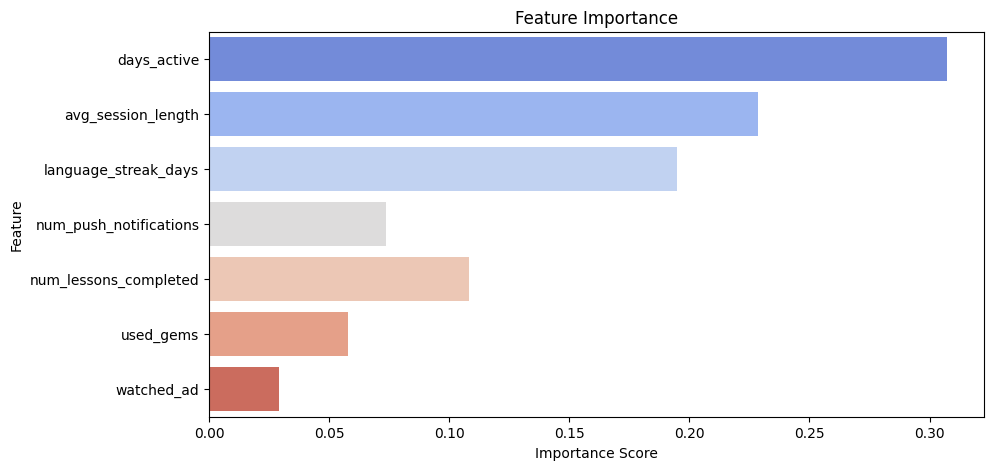

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Features and target
X = df.drop(columns=['user_id', 'return_tomorrow'])
y = df['return_tomorrow']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
features = X.columns

# Visualize feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()